In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Chapitre 3 : Traitement de données en tables</center></span>

### Introduction

Les **données** constituent la **matière première** de toute activité numérique. Il faut commencer par les lire avant de pouvoir les afficher, les trier, faire des calculs, les modifier, ...

Pour cela, il est nécessaire de :
- les **stocker** de manière persistante; aujourd'hui on utilise des  fichiers informatiques mais en 1930, le premier support de stockage de données était des cartes perforées : 
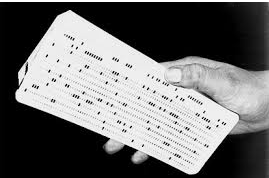


- les **structurer** correctement pour que l’on puisse les exploiter plus facilement; cela consiste en général à les regrouper en lignes et en colonnes, souvent avec des noms. Depuis 1979, on peut utiliser pour cela des tableurs dont le premier s'appelait VisiCalc :

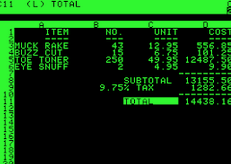

## I. Programme officiel
|Contenus | Capacités attendues|
|:-|:-:|
|Indexation de tables| Importer une table depuis un fichier texte tabulé ou un fichier CSV.|
|Recherche dans une table|Rechercher les lignes d’une table vérifiant des critères exprimés en logique propositionnelle.|
|Tri d’une table|Trier une table suivant une colonne.|
|Fusion de tables | Construire une nouvelle table en combinant les données de deux tables.|

## II. Données et informations

### 1. Les données

Les **données** sont des **ensembles de symboles** (mots, nombres, images, sons, ...) qui ont en général pour objectif de **représenter le monde réel** (objets, événements, ...).

Elles peuvent être **quantitatives** quand elles sont sous la forme de **nombres** (âge, poids taille, température, ...) ou **qualitatives** sinon (noms, prénom, adresse, ...).

### 2. Les informations

Une **information** est une **donnée interprétée**, c'est-à-dire que c'est le **sens que l'on peut attribuer à une donnée brute** dans un contexte donné.

**Exemple :**

Prenons la donnée quantitative suivante : $2 81 12 92 01208680$.
En tant que donnée brute, c’est juste une série de chiffres mais si on précise que c’est un numéro de sécurité sociale (contexte), on peut en déduire que la personne à qui il appartient est une femme (2) née en 1981 (81) au mois de décembre (12) dans le département des Hauts de
Seine (92).

### 3. Comment notre cerveau transforme les données en information ?
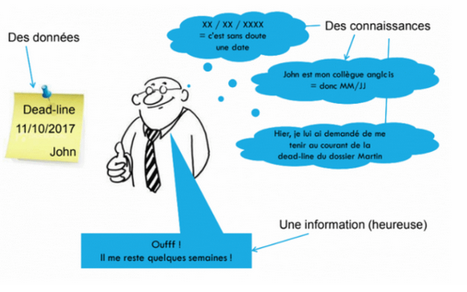

## III.  Données structurées

### 1. Vocabulaire

Pour **structurer les données**, on peut les décrire à l'aide de **descripteurs** (ou champs) compréhensibles par celui qui veut les interpréter. Tous les **objets** dont les données partagent les **mêmes descripteurs** forment une **collection**.


### 2. Exemple

Prenons le cas d’une médiathèque. Lors de son inscription, un abonné fournit des données ("Tartempion", "Georges", "12 rue de la Soif - 75000 Paris", 06 67 85 23 45, 27) qui seront associées à des descripteurs (Nom, Prénom, Adresse, Numéro de téléphone, Age) puis rangées dans une table, avec tous les autres abonnés qui ont tous les mêmes descripteurs.

On crée ainsi une **collection d'abonnés** qui ressemble à ceci :

|Numéro d'abonné | Nom| Prénom | Adresse |Numéro de téléphone |Age|
|:-|:-:|:-:|:-:|:-:|:-:|
|...|...|...|...|...|...|
|27593758|Tartempion|Georges|12 rue de la Soif - 75000 Paris|06 67 85 23 45|27|
|...|...|...|...|...|...|

Dans cette **table**, chaque **tête de colonne** est un **descripteur** et chaque **ligne** est un **objet** de la **collection**. Par exemple, *Georges* est la valeur du descripteur *Prénom* pour l'objet $27593758$.

De la même façon, la médiathèque constitue des collections de prêts, de livres, de jeux ou de films et regroupe le tout dans une **base de données**.

### 3. Open et Big Data

De plus en plus de données sont **considérées d'utilité publique** et **mises à disposition de tous** sur internet sous forme de bases de données; on parle **d'Open Data** (voir data.gouv.fr par exemple).

Par ailleurs, **internet et les objets connectés** produisent **d'immenses quantités de données** dont l'exploitation constitue un énorme enjeu économique pour aujourd'hui et le futur; on parle de **Big Data**.

## IV. Formats de fichiers

Les 3 principaux formats de fichier qui permettent de stocker des données structurées sont les formats CSV, XML et JSON.

### 1. Le format CSV

**CSV** signifie **Comma-Separated Values**, dans ce format de fichier les valeurs sont donc normalement **séparées par des virgules**. Cependant, il est aussi **possible d'utiliser d'autres séparateurs** comme le point virgule par exemple.

Exemple :
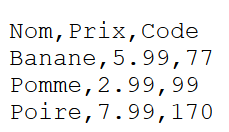

### 2. Le format XML

**XML** signifie **eXtensible Markup Language**, dans ce format de fichier les données sont **structurées par des balises**.

Exemple :
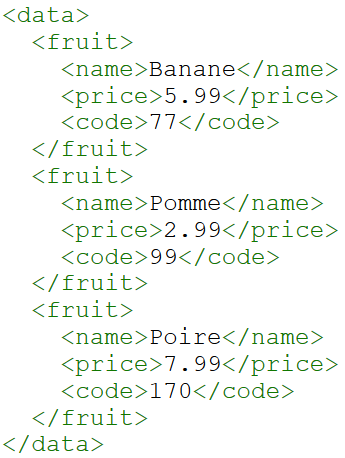

### 4. Le format JSON

**JSON** signifie **JavaScript Objet Notation**, dans ce format les données sont représentées sous forme **d'objets JavaScript** qui se présentent comme une **liste de dictionnaires**.
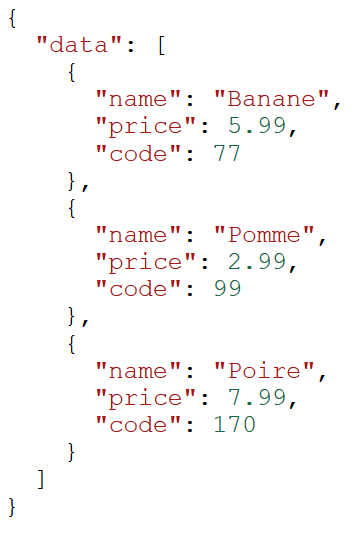

### 5. Application

Sur une feuille, écrire la représentation dans les 3 formats CSV, XML et JSON de la table suivante :

|Nom | Prénom| Nombre de voix|
|:-|:-:|:-:|
|Dupond|Emile|514|
|Dupont|Chloé|632|
|Dupons|Camille|421|


## V. Importation d'une table en Python

### 1.  Lecture d'un fichier
Pour **ouvrir un fichier**, on utilise la fonction `open` avec l'argument `"r"` pour *read*, ce qui signifie qu'on souhaite **accéder aux données contenues dans le fichier sans les modifier**. Par exemple, ``file=open("exemple.csv","r")`` permet d'ouvir le fichier *exemple.csv* en **lecture seule** et d'associer son contenu à la variable `file`.

En réalité, à ce stade, c'est un peu comme si le fichier était un livre ouvert qu'on est prêt à lire mais en réalité, on a encore rien lu. Pour le **lire réellement**, il faut utiliser la méthode `.readline()` pour **lire une seule ligne** et placer le curseur au début de la ligne suivante (comme si on parcourait le livre avec son index) ou la méthode `.readlines()` pour **lire toutes les lignes** d'un seul coup.

Une fois que les données sont lues, il faut **refermer le fichier** avec la méthode `.close()`.

### 2. Exemple

Le fichier *ident_pointVirgule.csv* est un fichier texte qui contient le texte suivant :

nom;prenom;date_naissance;age

Durand;Jean-Pierre;23/05/1985;35

Dupont;Christophe;15/12/1967;53

Terta;Henry;12/06/1978;42

**NB :** Le ";" est souvent utilisé à la place de la "," en France car la "," est déjà utilisée comme séparateur décimal pour les nombres réels. On évite ainsi les confusions.

In [3]:
#Exemple 1 :
file=open("Files/ident_pointVirgule.csv","r") #on ouvre le fichier
ligne1=file.readline() # on lit la première ligne
lignes=file.readlines() # on lit toutes les autres lignes
file.close() # on ferme le fichier
print(ligne1) # affichage de la première ligne
print(lignes) #affichage du reste

nom;prenom;date_naissance;age

['Durand;Jean-Pierre;23/05/1985;35\n', 'Dupont;Christophe;15/12/1967;53\n', 'Terta;Henry;12/06/1978;42\n']


#### Remarques :
- `ligne1`est une **simple chaîne de caractères** qui contient toute la première ligne du fichier.
- `lignes` par contre est une **liste de chaîne de caractères**, une pour chaque ligne du fichier.
- Quand on utilise la méthode `.readlines()`, on remarque la présence à la fin de chaque ligne d'un `\n`. Ce caractère spécial correspond à un **retour à la ligne**. On peut s'en débarasser avec la méthode `.rstrip()` qui supprime les caractères invisibles à la fin de la chaîne.

**NB :** Le retour à la ligne est aussi présent avec la méthode `.readline()` mais l'instruction `print()` effectue directement le retour à la ligne au lieu de l'afficher. Et comme cette instruction effectue déjà un retour à la ligne en temps normal, cela explique qu'une ligne ait été sautée dans l'exemple précédent.

### 3. Conversion du fichier CSV en table

Quand on lit un fichier CSV, on aimerait bien obtenir une **table**, c'est-à-dire une **liste de listes**.
Pour cela, il est nécessaire de découper chaque ligne en une liste de chaînes de caractères, ce que permet de faire la méthode `.split()`. En addition, la méthode `.rstrip()` permet de se débarasser des retours à la ligne.

Tout cela peut se faire très efficacement **en une seule ligne** en créant la table **par compréhension** comme dans l'exemple suivant.

In [4]:
#Exemple 2 :
file=open("Files/ident_pointVirgule.csv","r") #on ouvre le fichier
table=[ligne.rstrip().split(';') for ligne in file]
#ligne parcourt file et à chaque nouvelle ligne on découpe avec split et on enlève le retour à la ligne avec rstrip
file.close() # on ferme le fichier
print(table) #on affiche le résultat

[['nom', 'prenom', 'date_naissance', 'age'], ['Durand', 'Jean-Pierre', '23/05/1985', '35'], ['Dupont', 'Christophe', '15/12/1967', '53'], ['Terta', 'Henry', '12/06/1978', '42']]


Avec la méthode précedente, on remarque que notre **table ne comporte que des chaînes de caractères**. Or il pourrait être utile que la colonne *age* contienne plutôt des nombres afin de pouvoir faire des calculs ensuite. On dira alors que le descripteur *age* n'a pas le même **domaine de valeurs** que les autres descripteurs car leurs **valeurs possibles** ne sont pas les mêmes. 

Pour cela, il est nécessaire de **décomposer la création de la table** afin de convertir (ici avec `int()`) les données au fur et à mesure qu'on remplit la table.

In [5]:
#Exemple 3 :
file=open("Files/ident_pointVirgule.csv","r") #on ouvre le fichier
descripteurs=file.readline().rstrip().split(';') # on lit la première ligne, on enlève le \n, on découpe à chaque ; et on met le résultat dans descripteurs
lignes=file.readlines() # on lit toutes les lignes
table=[] # on crée une table vide
for ligne in lignes : #on itère la variable ligne sur chaque élément de lignes
    liste=ligne.rstrip().split(';') #on crée la liste sans retour à la ligne
    liste[3]=int(liste[3]) # on convertit l'age en entier
    table.append(liste) #on ajoute la liste obtenue à table
file.close() # on ferme le fichier
print(descripteurs) # on affiche les descripteurs
print(table) #on affiche les données

['nom', 'prenom', 'date_naissance', 'age']
[['Durand', 'Jean-Pierre', '23/05/1985', 35], ['Dupont', 'Christophe', '15/12/1967', 53], ['Terta', 'Henry', '12/06/1978', 42]]


### 4. L'instruction `with`

On peut aussi ouvrir un fichier avec l'instruction `with` qui a l'avantage de **fermer automatiquement le fichier, même en cas de plantage du programme**.

Comme les instructions `for`ou `if`, une ligne commencant par `with` finit par `:` et est donc suivi d'un bloc d'indentation. **Le fichier se ferme tout seul (pas besoin de `.close()`) à la fin de ce bloc d'indentation.**

In [6]:
#Exemple 4 :
with open("Files/ident_pointVirgule.csv","r") as file : #on ouvre le fichier
    descripteurs=file.readline().rstrip().split(';') # on lit la première ligne, on enlève le \n, on découpe à chaque ; et on met le résultat dans descripteurs
    lignes=file.readlines() # on lit toutes les lignes
    table=[] # on crée une table vide
    for ligne in lignes : #on itère la variable ligne sur chaque élément de lignes
        liste=ligne.rstrip().split(';') #on crée la liste sans retour à la ligne
        liste[3]=int(liste[3]) # on convertit l'age en entier
        table.append(liste) #on ajoute la liste obtenue à la table
print(descripteurs) # on affiche les descripteurs
print(table) #on affiche les données

['nom', 'prenom', 'date_naissance', 'age']
[['Durand', 'Jean-Pierre', '23/05/1985', 35], ['Dupont', 'Christophe', '15/12/1967', 53], ['Terta', 'Henry', '12/06/1978', 42]]


### 5. La bibliothèque  `csv`

Il existe en Python une blibliothèque `csv` qui permet de **faciliter la manipulation de ce format de fichiers**.
La methode `.reader()` de cette bibliothèque permet notamment de réaliser facilement le découpage des lignes et la suppression des retours à la ligne sans avoir besoin des méthodes `.rstrip()` et `.split`.

In [18]:
#Exemple 5 :
import csv
with open("Files/ident_pointVirgule.csv","r") as file : #on ouvre le fichier
    lignes=csv.reader(file,delimiter=";") # on lit toutes les lignes
    table=[] # on crée une table vide
    for ligne in lignes : #on itère la variable ligne sur chaque élément de lignes
        table.append(ligne) #on ajoute la ligne à la table
descripteurs=table.pop(0) # on met la première ligne dans descripteurs et on l'enlève de table (sinon on aura une erreur de conversion ensuite)
for ligne in table : #on parcourt les lignes
    ligne[3]=int(ligne[3]) # on convertit l'age en entier
print(descripteurs) # on affiche les descripteurs
print(table) #on affiche les données

['nom', 'prenom', 'date_naissance', 'age']
[['Durand', 'Jean-Pierre', '23/05/1985', 35], ['Dupont', 'Christophe', '15/12/1967', 53], ['Terta', 'Henry', '12/06/1978', 42]]


## VI. Recherche dans une table

L'objectif d'une recherche dans une table est de **trouver et d'obtenir la valeur précise d'un objet** pour un ou plusieurs descripteurs. On parle de **requête**.

Par exemple, considérons la requête suivante : "Quels sont les noms des personnes agées de plus de 40 ans ?"

In [19]:
#Exemple 6 :
#Grâce aux exemples précédent table contient déjà nos données, il n'est donc pas utile de lire le fichier à nouveau
reponse=[]
for ligne in table :
    if ligne[3] > 40 : reponse.append(ligne[0])
print(reponse)

['Dupont', 'Terta']


## VII. Tri d'une table

L'objectif d'un tri est de **ranger les objets** (lignes de la table) **selon l'ordre d'un de ses decripteurs** (d'une de ses colonnes). Pour cela, on peut utiliser la fonction `sorted()` pour **créer une nouvelle table triée** ou la méthode `.sort()` qui **tri la table sur place en la modifiant**.

Par exemple, trions notre table selon l'age des personnes :

In [20]:
#Exemple 7 :
# Table contient toujours les données
table_triee=sorted(table,key= lambda ligne : ligne[3])
#ici la clé de tri est une fonction qui, à chaque ligne associe son 4ème élément, on trie donc sur la colonne 3
table.sort(key= lambda ligne : ligne[3])
#fait la même chose mais le tri se fait sur place, c'est-à-dire que table est directement modifiée
print(table)
print(table_triee)

[['Durand', 'Jean-Pierre', '23/05/1985', 35], ['Terta', 'Henry', '12/06/1978', 42], ['Dupont', 'Christophe', '15/12/1967', 53]]
[['Durand', 'Jean-Pierre', '23/05/1985', 35], ['Terta', 'Henry', '12/06/1978', 42], ['Dupont', 'Christophe', '15/12/1967', 53]]


## VII. Fusion de tables

**Fusionner deux tables** signifie les **assembler pour en faire une seule**. Il faut pour cela que les **domaines de valeurs** de leurs descripteurs communs soient **identiques**.

Il y a essentiellement 2 cas de figures :
- Les deux tables ont les **mêmes descripteurs mais des objets différents**. Il suffit alors d'ajouter les objets supplémentaires de la deuxième table à la première (on ajoute des lignes), on parle de **concaténation**. Mais il faut tout de même faire attention à de qu'il n'y ait pas de doublons (objets identiques dans les deux tables).
- Les deux tables ont les **mêmes objets mais des descripteurs différents**. Il faut alors ajouter les descripteurs de la deuxième table à la première, on parle de **jointure**.

In [21]:
# Exemple 8 :
#table2 contient juste des personnes supplémentaire par rapport à la précédente
table2=[['Lafont', 'Robert', '27/12/1965', 55], ['Tristan', 'Pierre', '2/09/1998', 22], ['Dupuis', 'Alexandre', '15/12/2007', 13]]
table_fusion = table+table2 #l'opérateur + permet de concaténer des listes
print(table_fusion)
#table3 contient les mêmes personnes mais avec un descripteur supplémentaire qui est leur département de naissance
table3=[['Durand', 'Jean-Pierre', 6], ['Terta', 'Henry', 23], ['Dupont', 'Christophe', 42], ['Lafont', 'Robert', 15], ['Tristan', 'Pierre', 78], ['Dupuis', 'Alexandre', 95]]
for ligne1 in table_fusion : #ligne1 parcourt les lignes de table_fusion
    for ligne2 in table3 : #ligne2 parcourt les lignes de table3
        if ligne1[0]==ligne2[0] and ligne1[1]==ligne2[1] : #on vérifie que le nom et le prénom sont les mêmes dans les 2 tables
            for i in range(2,len(ligne2)): #on fait démarrer i à 2 car les 2 première colonnes sont déjà dans table_fusion
                ligne1.append(ligne2[i]) #on ajoute les nouvelles colonnes pour cette ligne de table_fusion
print(table_fusion)

[['Durand', 'Jean-Pierre', '23/05/1985', 35], ['Terta', 'Henry', '12/06/1978', 42], ['Dupont', 'Christophe', '15/12/1967', 53], ['Lafont', 'Robert', '27/12/1965', 55], ['Tristan', 'Pierre', '2/09/1998', 22], ['Dupuis', 'Alexandre', '15/12/2007', 13]]
[['Durand', 'Jean-Pierre', '23/05/1985', 35, 6], ['Terta', 'Henry', '12/06/1978', 42, 23], ['Dupont', 'Christophe', '15/12/1967', 53, 42], ['Lafont', 'Robert', '27/12/1965', 55, 15], ['Tristan', 'Pierre', '2/09/1998', 22, 78], ['Dupuis', 'Alexandre', '15/12/2007', 13, 95]]


## VII. Recherche et suppression des doublons

Lorsque l'on fusionne des tables, il n'est pas rare que des **objets se retrouvent présent en deux exemplaires**, on parle de **doublons**.

Suivant les cas, on pourra considérer qu'il suffit que la valeur d'un seul descripteur soit identique pour deux objets pour que ce soient des doublons ou au contraire que toutes les valeurs de tous les descripteurs doivent être identiques (ou même seulement certains d'entre eux).

In [22]:
# Exemple 9 :
table_fusion = table_fusion+[['Lafont', 'Robert', '27/12/1965', 55]] #on ajoute un doublon
print(table_fusion)
#on construit une nouvelle table sans doublon (supprimer le doublon "sur place" est plus compliqué)
table_sans_doublon=[]
for ligne in table_fusion : #ligne parcourt les lignes de table_fusion
    doublon = False # ce booléne passera à vrai si un doublon est trouvé
    for i in range(len(table_sans_doublon)) : #i permet de parcourir les lignes déjà existantes de table_sans_doublon
            if ligne[0] == table_sans_doublon[i][0] : doublon = True #on vérifie si le nom de cette ligne existe déjà dans table_sans_doublon
    if not(doublon) : table_sans_doublon.append(ligne) # si aucun doublon n'a été trouvé pour cette ligne, on l'ajoute à table_sans_doublon
print(table_sans_doublon)

[['Durand', 'Jean-Pierre', '23/05/1985', 35, 6], ['Terta', 'Henry', '12/06/1978', 42, 23], ['Dupont', 'Christophe', '15/12/1967', 53, 42], ['Lafont', 'Robert', '27/12/1965', 55, 15], ['Tristan', 'Pierre', '2/09/1998', 22, 78], ['Dupuis', 'Alexandre', '15/12/2007', 13, 95], ['Lafont', 'Robert', '27/12/1965', 55]]
[['Durand', 'Jean-Pierre', '23/05/1985', 35, 6], ['Terta', 'Henry', '12/06/1978', 42, 23], ['Dupont', 'Christophe', '15/12/1967', 53, 42], ['Lafont', 'Robert', '27/12/1965', 55, 15], ['Tristan', 'Pierre', '2/09/1998', 22, 78], ['Dupuis', 'Alexandre', '15/12/2007', 13, 95]]


Il ne nous reste plus qu'à mettre tout ça en application avec de "vraies" données.